# Analiza skupa podataka: Body signal of smoking

Cilj je da se na osnovu bio-signala utvrdi da li je osoba pusac.

Tacna identifikacija pušača i nepušača omogucava tacnije i preciznije proučavanje uticaja pušenja na zdravstvene ishode. 
Ocigledno je važnije ispravno identfikovati pušače nego nepušače, jer su zdravstveni rizici povezani s pušenjem puno veći od rizika povezanih s nepušenjem. Medjutim, takodje je vazno smanjiti broj pogresno klasifikovanih nepusaca kao pusaca jer to moze imati negativne posledice poput stisanja pojedinaca koji ne puše.

Skup se sastoji od 55692 reda i narednih 27 atributa:

    ID : index
    gender
    age : 5-years gap
    height(cm)
    weight(kg)
    waist(cm) : Waist circumference length
    eyesight(left)
    eyesight(right)
    hearing(left)
    hearing(right)
    systolic : Blood pressure
    relaxation : Blood pressure
    fasting blood sugar
    Cholesterol : total
    triglyceride
    HDL : cholesterol type
    LDL : cholesterol type
    hemoglobin
    Urine protein
    serum creatinine
    AST : glutamic oxaloacetic transaminase type
    ALT : glutamic oxaloacetic transaminase type
    Gtp : γ-GTP
    oral : Oral Examination status
    dental caries
    tartar : tartar status
    smoking


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import classification_report
from termcolor import colored
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

Ucitavanje i analiza skupa podataka:

In [2]:
data = pd.read_csv("/home/ivana/Desktop/IP-projekat/2023_Data_Mining_Smoking_Dataset/datasets/smoking.csv")
data.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [3]:
data.shape

(55692, 27)

In [4]:
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


Tip atributa i jedinstvene vrednosti:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [6]:
n_unique_values = 500
all_columns = data.columns.to_list()
categorical_columns = []

for i, column in enumerate(all_columns):
    temp = data.loc[:, column].unique()
    if len(temp) < n_unique_values:
        print (f"{i+1}. {column} ima {len(temp)} jedinstvenih vrednosti i to su: {temp}")
        categorical_columns.append(column)
del temp

2. gender ima 2 jedinstvenih vrednosti i to su: ['F' 'M']
3. age ima 14 jedinstvenih vrednosti i to su: [40 55 30 45 50 35 60 25 65 20 80 75 70 85]
4. height(cm) ima 13 jedinstvenih vrednosti i to su: [155 160 170 165 180 150 175 140 185 145 190 135 130]
5. weight(kg) ima 22 jedinstvenih vrednosti i to su: [ 60  70  75  90  65  45  55  50  85  80 100  40  95 105 110 120  35 115
  30 125 130 135]
7. eyesight(left) ima 19 jedinstvenih vrednosti i to su: [1.2 0.8 1.5 1.  0.7 0.9 0.3 0.2 0.1 0.6 0.4 0.5 2.  9.9 1.3 1.6 1.9 1.1
 1.8]
8. eyesight(right) ima 17 jedinstvenih vrednosti i to su: [1.  0.6 0.8 1.5 1.2 0.7 0.4 0.9 0.3 0.1 0.5 2.  9.9 0.2 1.3 1.6 1.1]
9. hearing(left) ima 2 jedinstvenih vrednosti i to su: [1. 2.]
10. hearing(right) ima 2 jedinstvenih vrednosti i to su: [1. 2.]
11. systolic ima 130 jedinstvenih vrednosti i to su: [114. 119. 138. 100. 120. 128. 116. 153. 115. 113. 130. 124.  95. 122.
 102. 112. 126. 131. 127. 140. 118. 108. 117. 136. 142. 147. 125. 106.
 133. 123. 110

Atribut oral ima iste vrednosti za sve instance i nece nam dati nikakve korisne informacije 
pa cemo ga izbaciti iz skupa.
Slicno, atribut ID ima razlicite vrednosti za sve instance pa i njega izbacujemo iz skupa.

In [7]:
data.drop('ID', axis=1,inplace=True)
data.drop('oral', axis=1,inplace=True)

Hajde da vidimo kako ciljni atribut zavisi od pojedinacnih ulaznih atributa:

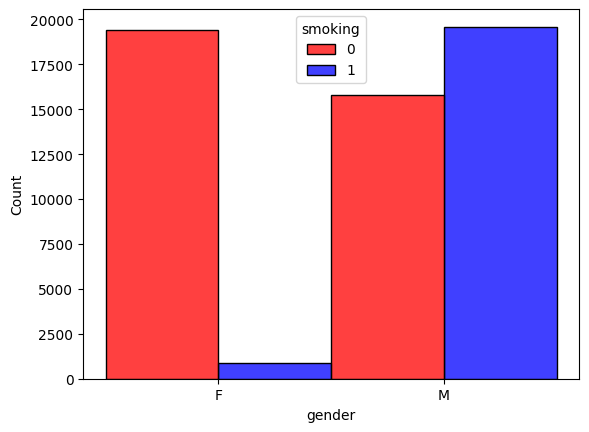

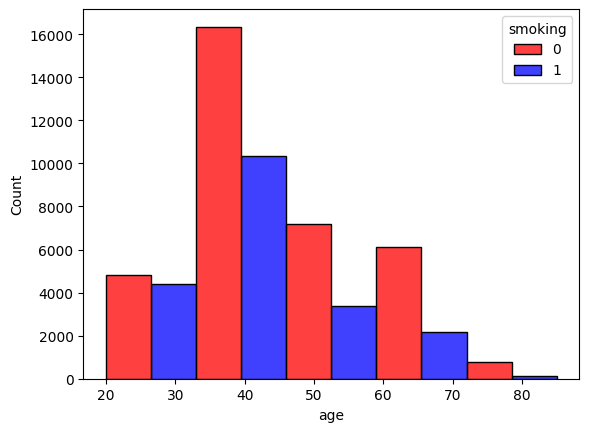

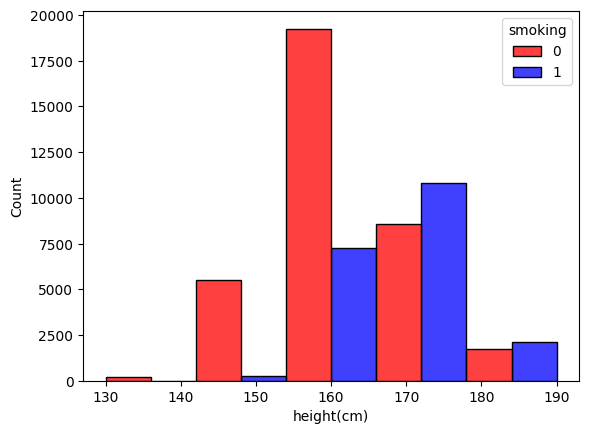

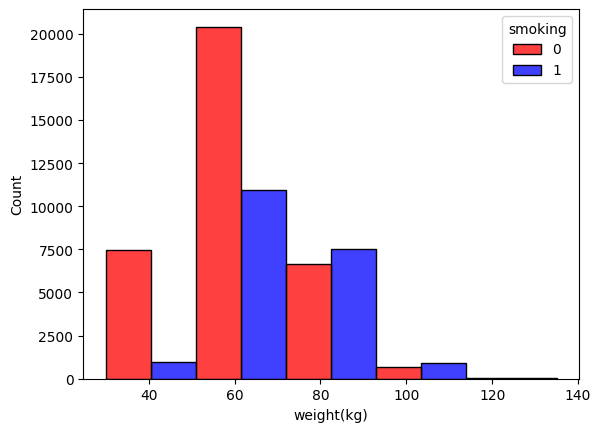

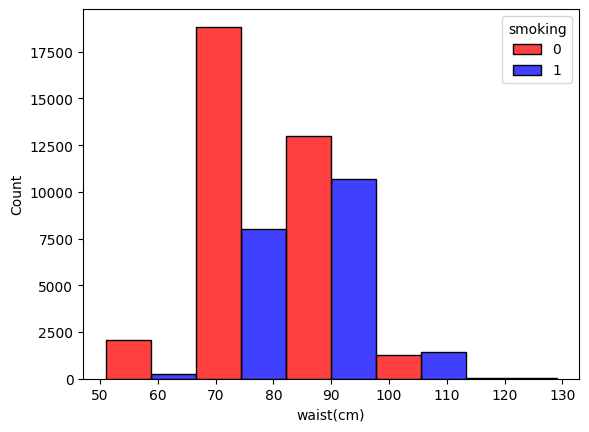

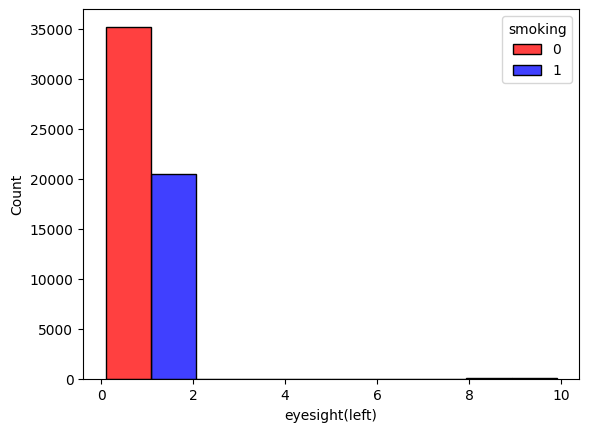

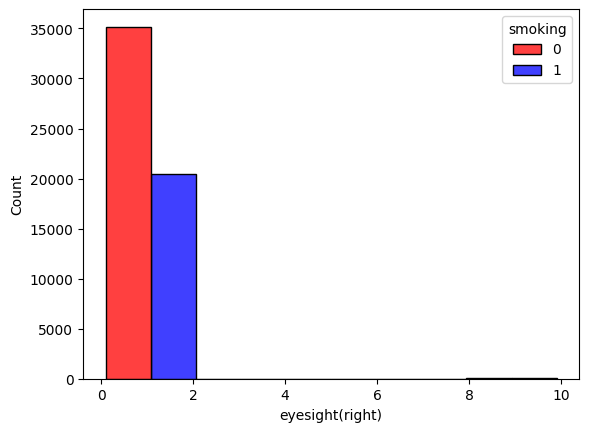

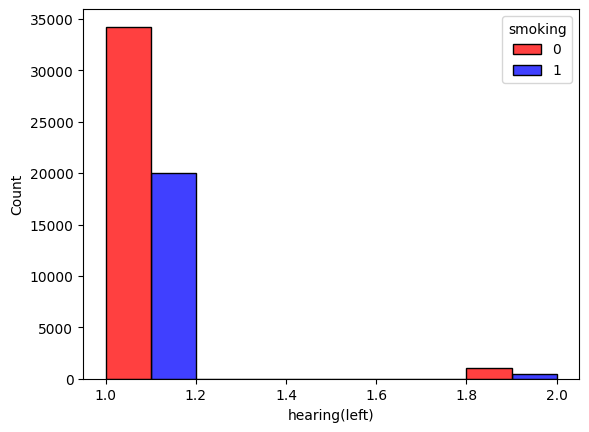

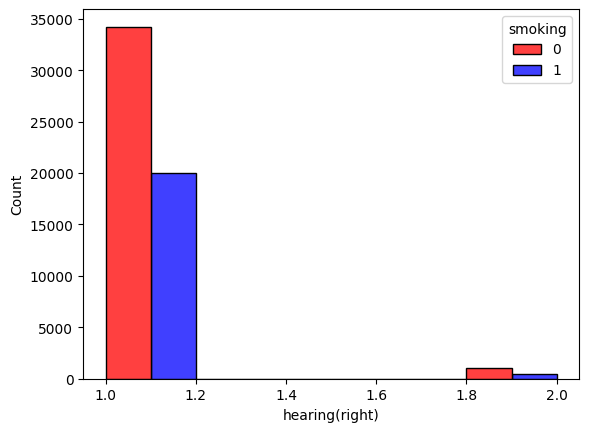

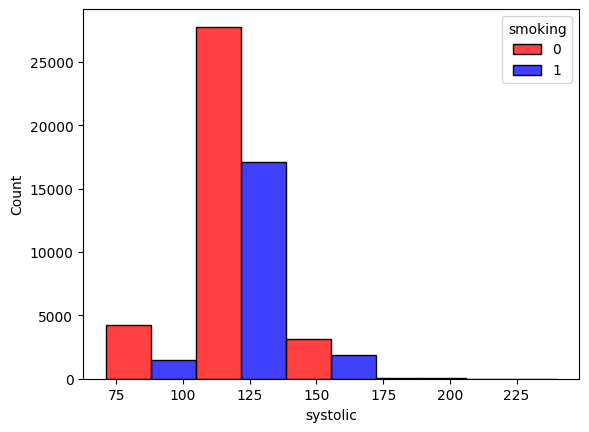

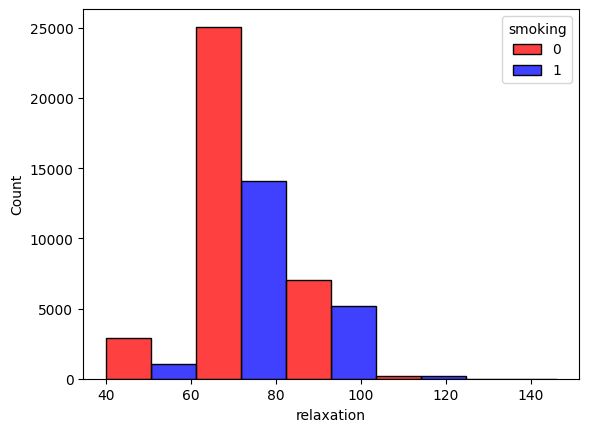

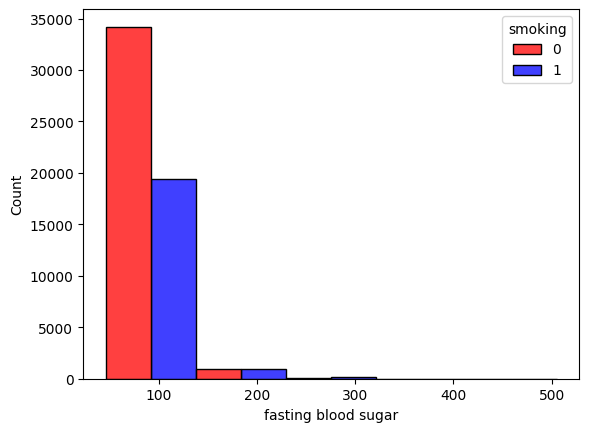

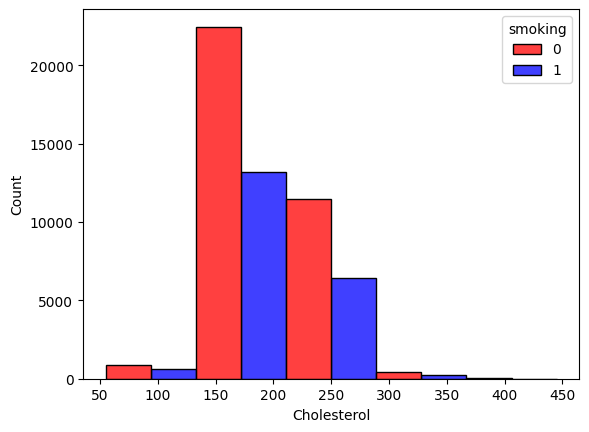

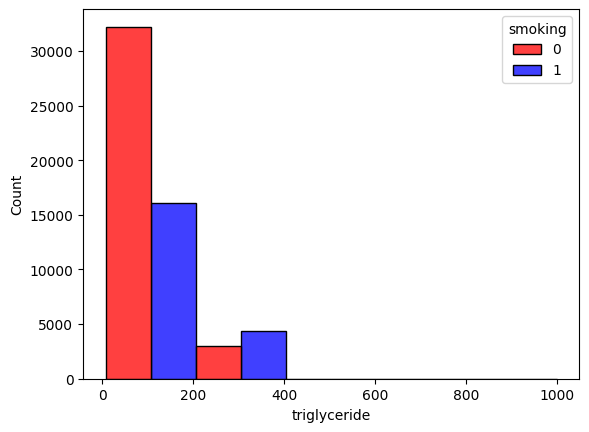

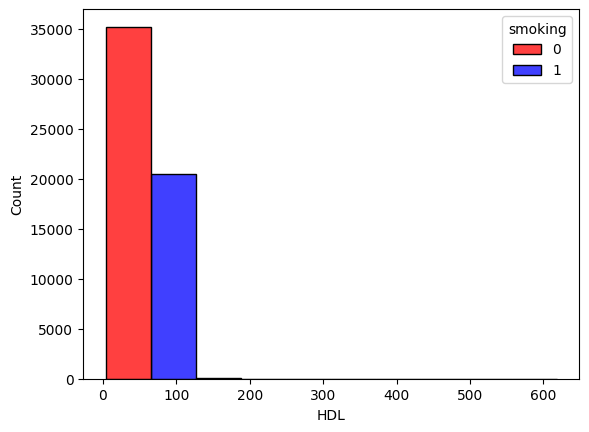

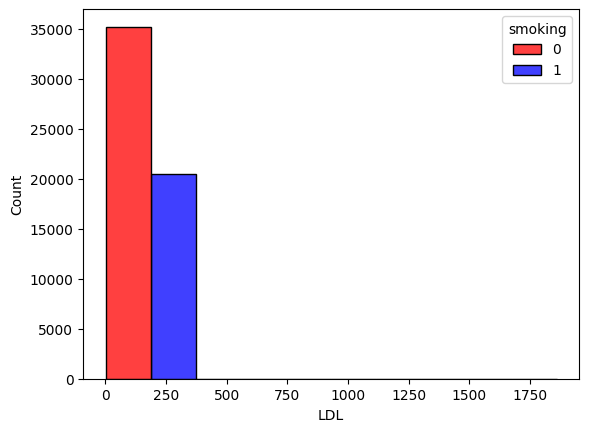

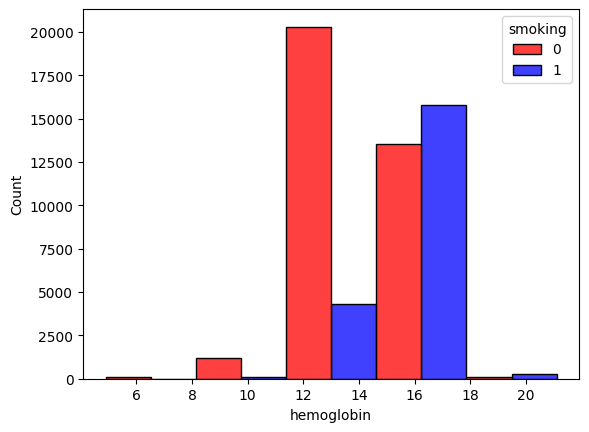

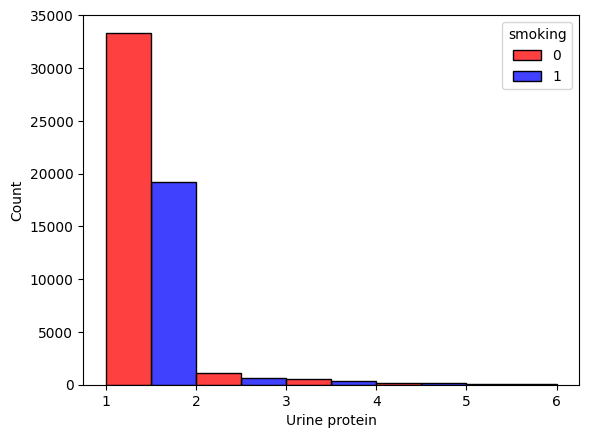

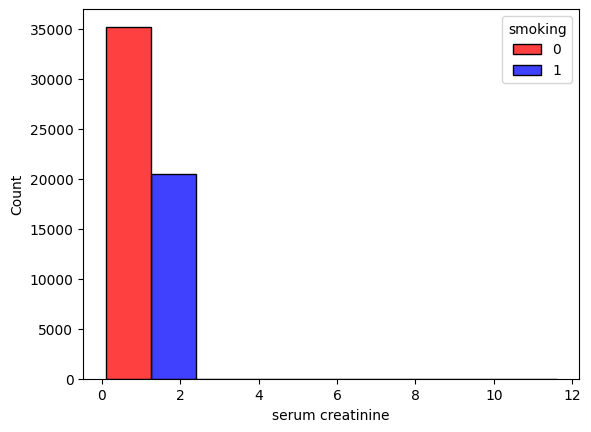

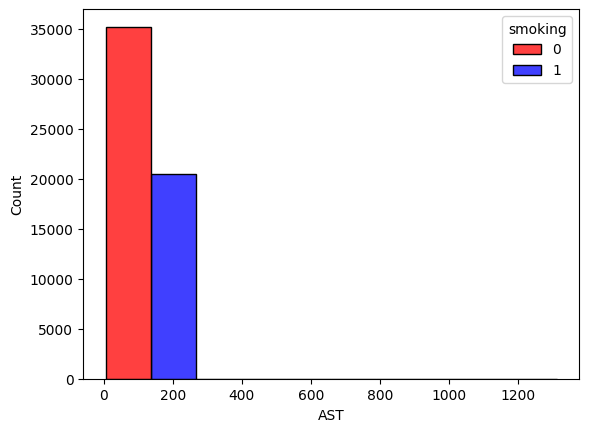

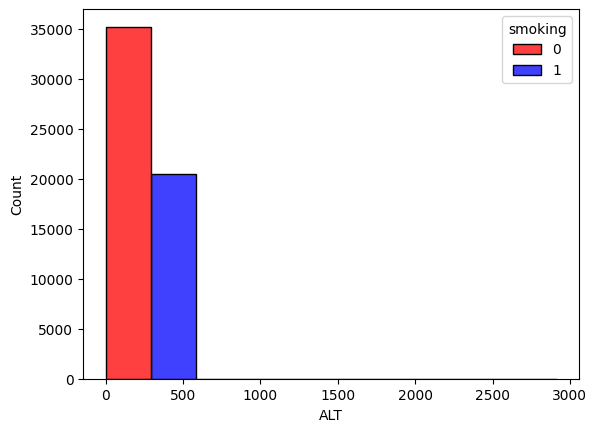

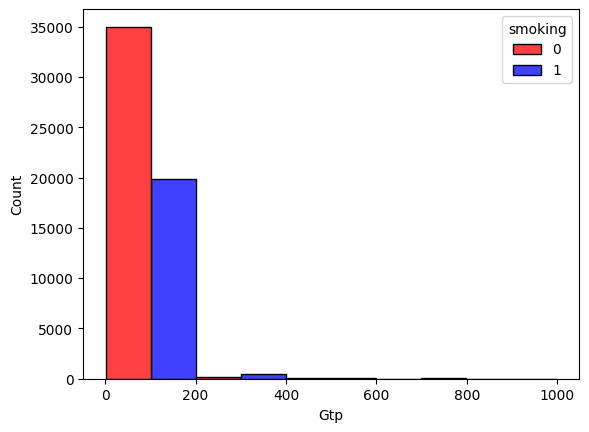

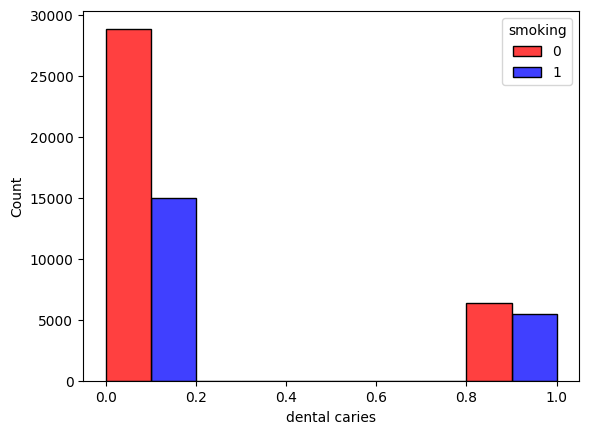

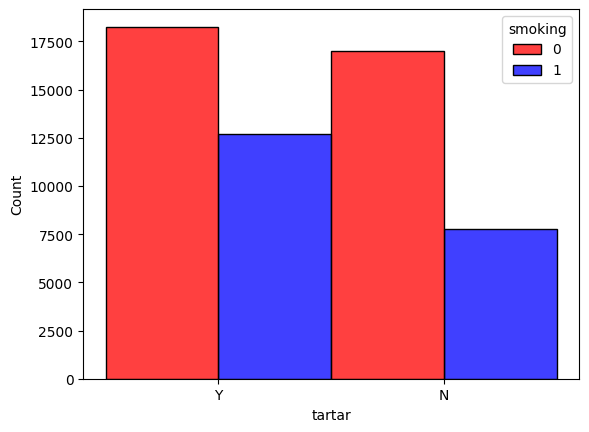

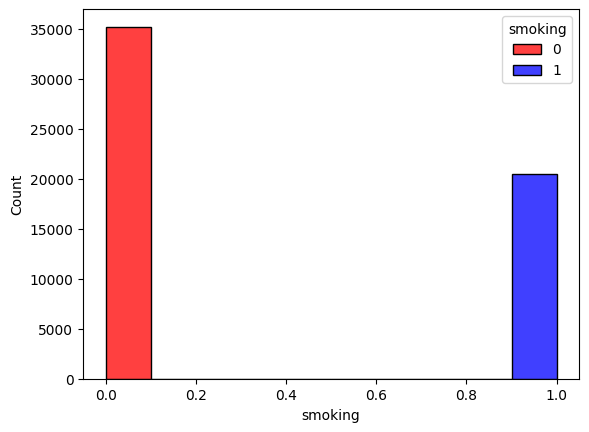

In [15]:
custom_palette = ['red', 'blue']
for col in data.columns:
    sns.histplot(data=data, x=col, hue='smoking', multiple="dodge", bins=5, palette=custom_palette)
    plt.show()

Rad sa nedostajucim vrednostima:

In [85]:
data.isna().any().any()

False

In [86]:
data.isna().any()

ID                     False
gender                 False
age                    False
height(cm)             False
weight(kg)             False
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
oral                   False
dental caries          False
tartar                 False
smoking                False
dtype: bool

Zakljucujemo da u skupu nema nedostajucih vrednosti.

In [8]:
data.shape

(55692, 25)

Mozemo videti da imamo dva kategoricka atributa: gender i tartar. Preslikacemo ih u binarne.

In [9]:
for col in ['gender','tartar']:
    data[col] = LabelEncoder().fit_transform(data[col])

Kako je nas skup podataka veliki, tesko je da uocimo odnose izmedju atributa. Zato koristimo dijagram korelacije koji nam pruza vizuelni rezime.

Text(0.5, 1.0, 'Matrica korelacije')

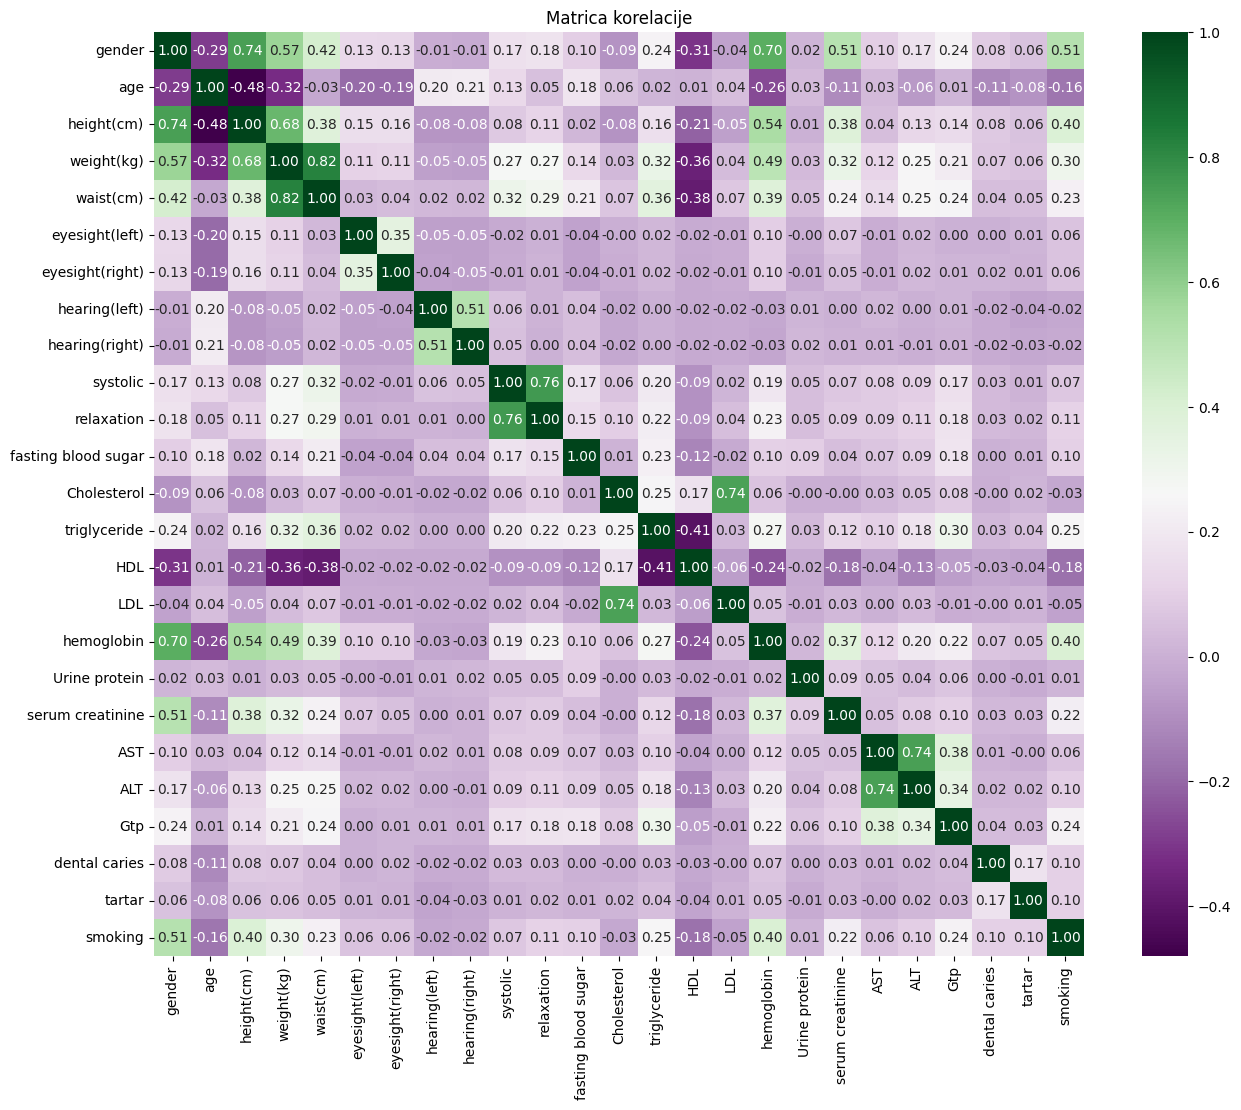

In [21]:
plt.figure(figsize=(15,12))

sns.heatmap(data.corr(), annot=True, cmap='PRGn', fmt='.2f',)
plt.title('Matrica korelacije')

Vidimo da postoje atributi koji su dosta povezani sa drugima. Neki od njih su:

    • gender |-> height,weight,waist,hemoglobin
    • height |-> gender,weight,hemoglobin,
    • weight |-> gender,weight,waist,hemoglobin
    • eyesight_left |-> eyesight_right i obrnuto
    • systolic |-> relaxation i obrnuto
    • cholesterol |-> ldl i obrnuto
    • ast |-> alt i obrnuto

In [10]:
#Kako obim struka dosta zavisi od tezine i nije nam toliko bitan atribut za nas slucaj, 
#izbacicu ga iz skupa
data.drop('waist(cm)', axis=1,inplace=True)

Zelim da uporedim raspodele podatke da budem sigurna da nema znacajne razlike izmedju njih pre nego sto ih izbacim iz skupa:

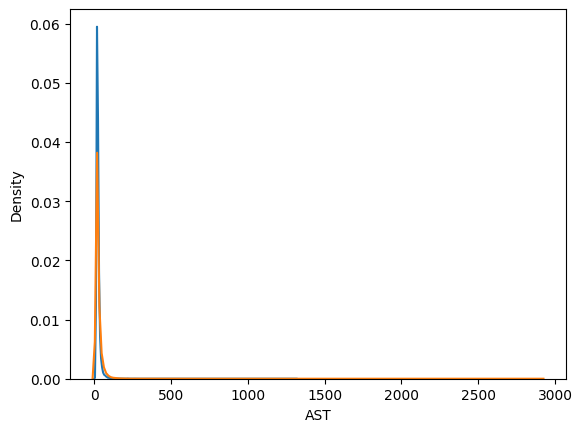

In [55]:
g1 = sns.kdeplot(data = data, x = 'AST')
g2 = sns.kdeplot(data = data, x = 'ALT')

In [56]:
imaju_ast_nemaju_alt = data[(data['ALT'].isnull()) & (data['AST'])]
imaju_ast_nemaju_alt

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking


In [57]:
imaju_alt_nemaju_ast = data[(data['AST'].isnull()) & (data['ALT'])]
imaju_alt_nemaju_ast

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking


In [58]:
#Uklanjamo ALT iz skupa:
data.drop('ALT', axis=1,inplace=True)

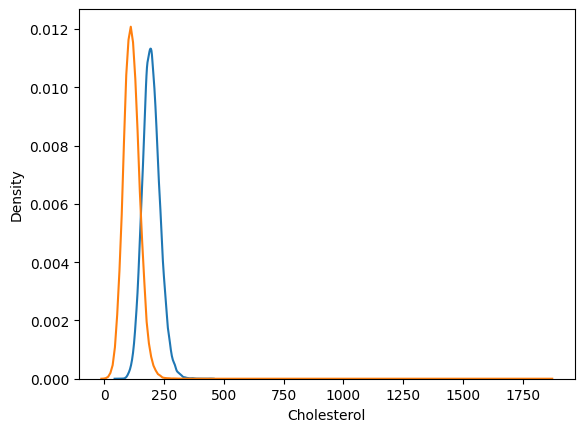

In [59]:
g1 = sns.kdeplot(data = data, x = 'Cholesterol')
g2 = sns.kdeplot(data = data, x = 'LDL')

In [60]:
imaju_ldl_nemaju_chol = data[(data['Cholesterol'].isnull()) & (data['LDL'])]
imaju_ldl_nemaju_chol

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,Gtp,dental caries,tartar,smoking


In [11]:
#Uklanjamo LDL iz skupa:
data.drop('LDL', axis=1,inplace=True)

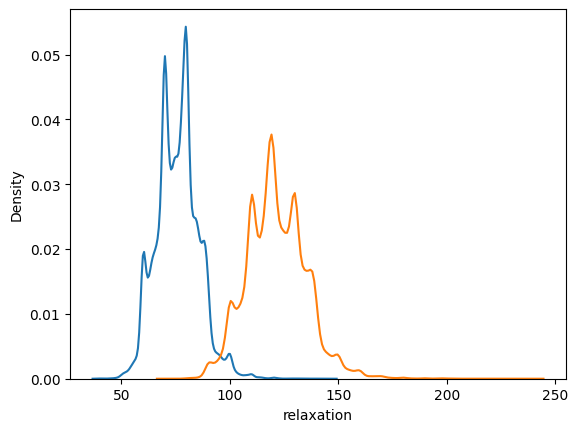

In [62]:
g1 = sns.kdeplot(data = data, x = 'relaxation')
g2 = sns.kdeplot(data = data, x = 'systolic')

In [63]:
imaju_sys_nemaju_relax = data[(data['relaxation'].isnull()) & (data['systolic'])]
imaju_sys_nemaju_relax

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,Gtp,dental caries,tartar,smoking


In [12]:
#Uklanjamo systolic iz skupa:
data.drop('systolic', axis=1,inplace=True)

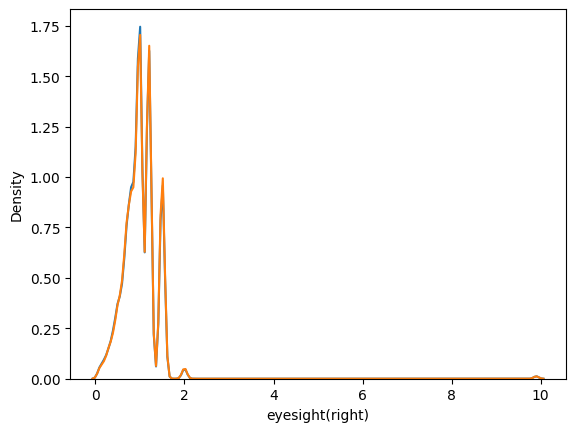

In [65]:
g1 = sns.kdeplot(data = data, x = 'eyesight(right)')
g2 = sns.kdeplot(data = data, x = 'eyesight(left)')

In [66]:
imaju_right_nemaju_left = data[(data['eyesight(left)'].isnull()) & (data['eyesight(right)'])]
imaju_right_nemaju_left

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),relaxation,...,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,Gtp,dental caries,tartar,smoking


In [13]:
#Uklanjamo eyesight(right) iz skupa:
data.drop('eyesight(right)', axis=1,inplace=True)

Text(0.5, 1.0, 'Pol')

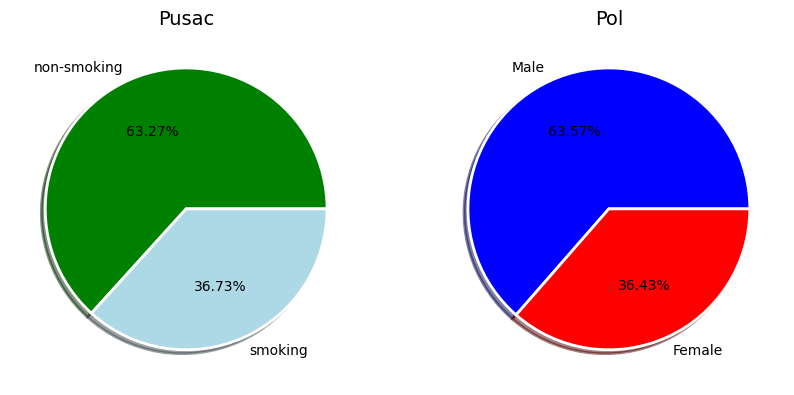

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.pie(data['smoking'].value_counts(), labels=['non-smoking','smoking'],
        autopct="%1.2f%%", colors = ["green", "#ADD8E6"], 
        wedgeprops=dict(width=1, edgecolor='w',linewidth=2), shadow=True,)
plt.title('Pusac', fontsize=14)


plt.subplot(122)
plt.pie(data['gender'].value_counts(), labels=['Male','Female'],
        autopct="%1.2f%%", colors = ["blue", "red"],
        wedgeprops=dict(width=1, edgecolor='white',linewidth=2), shadow=True,)
plt.title('Pol', fontsize=14,)

Vidimo da imamo 63.27% pusaca i 36.73% nepusaca. Takodje vdiimo da u skupu ima 63.57% muskarca i 36.43% zena.

Text(0.5, 1.0, 'Raspon numerickih atributa')

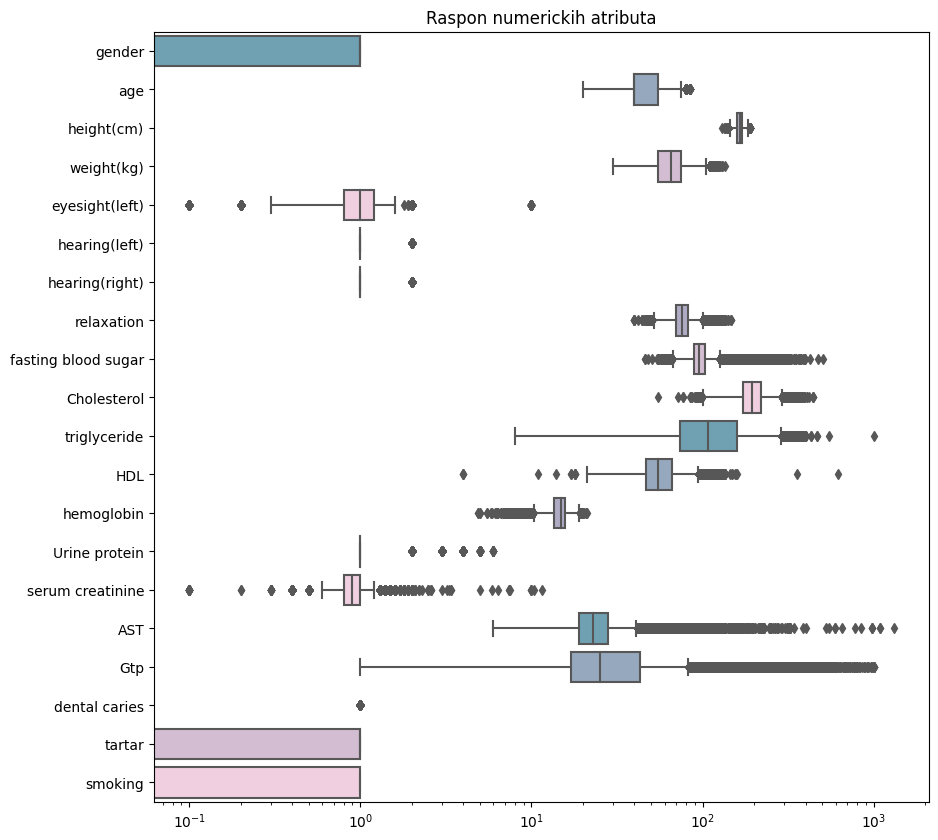

In [73]:
plt.figure(figsize=(10,10))

colors=['#64A6BD','#90A8C3','#ADA7C9', '#D7B9D5','#F4CAE0']
sns.boxplot(data=data, orient='h', palette=colors)
plt.xscale('log')
plt.title('Raspon numerickih atributa')


Mozemo zakljuciti da su svi podaci u razlicitim opsezima tako da bismo morali da ih normalizujemo ukoliko model to zahteva. Takodje mozemo zakljuciti da imamo autlajere.

Podela na ulazne i ciljne atribute:
    (Informacije o tome da li je osoba pusac se nalaze u koloni smoking sto predstavlja ciljni atrinut.
     Ostali atributi se koriste za predikciju - ulazni atributi)

In [15]:
Y = data['smoking']
X = data.drop('smoking', axis=1)
feature_names = X.columns
X.head()


,gender,age,height(cm),weight(kg),eyesight(left),hearing(left),hearing(right),relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
0,0,40,155,60,1.2,1.0,1.0,73.0,94.0,215.0,82.0,73.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1
1,0,40,160,60,0.8,1.0,1.0,70.0,130.0,192.0,115.0,42.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1
2,1,55,170,60,0.8,1.0,1.0,86.0,89.0,242.0,182.0,55.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0
3,1,40,165,70,1.5,1.0,1.0,60.0,96.0,322.0,254.0,45.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1
4,0,40,155,60,1.0,1.0,1.0,74.0,80.0,184.0,74.0,62.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0


In [16]:
Y.unique()

array([0, 1])

Klasa Y ima vrednosti 0 i 1 sto znaci da resavamo problem binarne klasifikacije.

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=12)

In [21]:
def IQR(data, feature_names):
    
    iqr = pd.DataFrame(0, index=feature_names, columns=['lower', 'min', 'num_lower', 'upper', 'max', 'num_upper', 'percantage'])
    for name in feature_names:

        (Q1, Q3) = X[name].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        upper = Q3 + (3 * IQR)
        lower = Q1 - (3 * IQR)
        
        iqr.loc[name, 'upper'] = upper
        iqr.loc[name, 'lower'] = lower

        num_of_out_lower = (X[name] < lower).sum()
        num_of_out_upper = (X[name] > upper).sum()

        percentage = round((num_of_out_lower + num_of_out_upper) / X.shape[0] * 100)

        iqr.loc[name, 'num_lower'], iqr.loc[name, 'num_upper'], iqr.loc[name, 'percantage']  = num_of_out_lower, num_of_out_upper, percentage
        iqr.loc[name, 'min'], iqr.loc[name, 'max'] = min(X[name]), max(X[name])    
    return iqr

In [32]:
iqr= IQR(X_train, feature_names)
print(iqr)

                     lower    min  num_lower  upper     max  num_upper  \
gender                -3.0    0.0          0    4.0     1.0          0   
age                   -5.0   20.0          0  100.0    85.0          0   
height(cm)           130.0  130.0          0  200.0   190.0          0   
weight(kg)            -5.0   30.0          0  135.0   135.0          0   
waist(cm)             40.0   51.0          0  124.0   129.0          8   
eyesight(left)        -0.4    0.1          0    2.4     9.9         92   
eyesight(right)       -0.4    0.1          0    2.4     9.9         92   
hearing(left)          1.0    1.0          0    1.0     2.0       1425   
hearing(right)         1.0    1.0          0    1.0     2.0       1456   
systolic              58.0   71.0          0  184.0   240.0         49   
relaxation            34.0   40.0          0  118.0   146.0         55   
fasting blood sugar   44.0   46.0          0  149.0   505.0       1410   
Cholesterol           28.0   55.0     

In [25]:
for x in data['dental caries']:
    if x != 0 and x != 1:
        print(x)
print('Ne postoji vrednost koja nije 0 ili 1!')

Ne postoji vrednost koja nije 0 ili 1!


Vidimo da atribut dental caries ima 21% autlajera. U ostalim atributima procenat autlajera je jako mali ili ih uopste nema.
S obzirom da dental caries uzima samo vrednosti 0 ili 1, resila sam da ostavim autlajere.

Provera balansiranosti klasa:

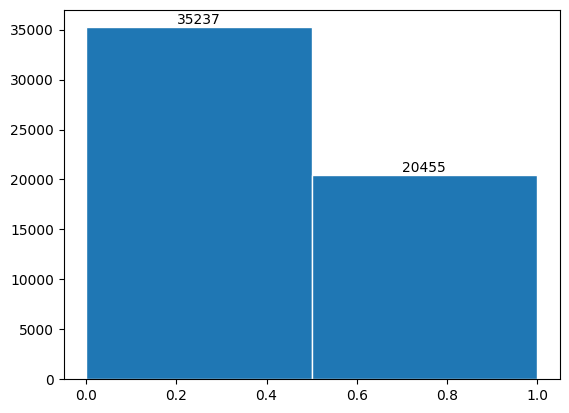

In [33]:
freq, bins, _ = plt.hist(Y, edgecolor='white', bins=2)

bin_centers = np.diff(bins)*0.5 + bins[:-1]

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate("{}".format(height),
               xy = (x, height),             
               xytext = (0,0.2),             
               textcoords = "offset points", 
               ha = 'center', va = 'bottom',
               )

plt.show()


Na osnovu histograma vidimo da se u skupu nalazi 35237 osoba koje nisu pusaci i 20455 osoba koje jesu pusaci. Primecujemo blagu nebalansiranost.
Posto imam blagu nebalansiranost koristicu f1-score kao meru evaluacije.


In [77]:
 data.to_csv('/home/ivana/Desktop/IP-projekat/2023_Data_Mining_Smoking_Dataset/datasets/data1.csv')